In [1]:
import numpy as np
import matplotlib.pyplot as plt
from fresco.potentials import UwNU
from fresco.optimize import LBFGS_CPP

In [2]:
Nside = 100       # Half side length of grid (will be 2*Nside+1)
ndim = 2          # Dimensions
L = np.ones(ndim) # 1x1 square box
gridsize = np.ones(ndim,dtype=np.int32)*int(2*Nside+1) # grid shape
x0 = np.ones(gridsize) # Initial condition

In [3]:
K = 10             # Distance from center of peaks we are constraining
Npeaks = 3         # Number of peaks we are constraining
thetas = (np.arange(Npeaks)/Npeaks)*np.pi

# Create list of peak coordinates to constrain
Kvecs = np.vstack([np.cos(thetas),np.sin(thetas)]).T*K/Nside
# Enforce the zero vector to help maintain total mass
Kvecs = np.vstack([np.zeros(ndim),Kvecs])

In [9]:
# Create the array of structure factor values corresponding to the k-vectors to be constrained
Sk = np.ones(Kvecs.shape[0])*np.sum(x0)

# Create the weighting function
wk = np.ones(Kvecs.shape[0])

In [10]:
loss = UwNU(gridsize, Kvecs, Sk, wk, L) # Initialize loss function
minimizer = LBFGS_CPP(x0.ravel(), loss, iprint=100) # Initialize minimizer

In [11]:
# Run the minimization
minimizer.run(1000)
res = minimizer.get_result()
x = np.array(res.coords)

lbgs: 0 E 1.62891341377917886e+09 rms 2.56810566198355737e+04 nfev 2 step norm 1.00000000000000006e-01
lbgs: 100 E 1.32800482391774273e+09 rms 2.20338153898184282e+04 nfev 102 step norm 1.00000000000000006e-01
lbgs: 200 E 1.07084718321359670e+09 rms 1.87493522228959737e+04 nfev 202 step norm 1.00000000000000006e-01
lbgs: 300 E 8.52978894002304912e+08 rms 1.58086635538035353e+04 nfev 302 step norm 1.00000000000000006e-01
lbgs: 400 E 6.70178358491223931e+08 rms 1.31927458172601819e+04 nfev 402 step norm 1.00000000000000006e-01
lbgs: 500 E 5.18463978759727776e+08 rms 1.08825954479668781e+04 nfev 502 step norm 1.00000000000000019e-01
lbgs: 600 E 3.94094156759452343e+08 rms 8.85920888060488687e+03 nfev 602 step norm 1.00000000000000006e-01
lbgs: 700 E 2.93567294314590216e+08 rms 7.10358254983292318e+03 nfev 702 step norm 1.00000000000000006e-01
lbgs: 800 E 2.13621793122201383e+08 rms 5.59671289028426236e+03 nfev 802 step norm 1.00000000000000006e-01
lbgs: 900 E 1.51236054752582490e+08 rms 4

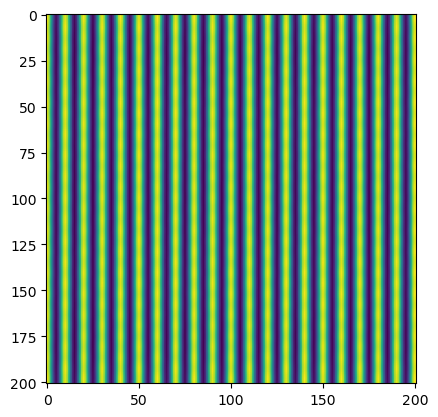

In [12]:
output = x.reshape(gridsize)

fig = plt.figure()
ax = fig.gca()
ax.imshow(output)
ax.set_aspect('equal')
plt.show()

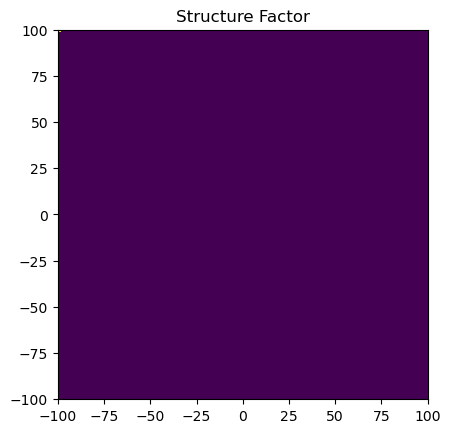

In [13]:
rhohat = np.fft.fft2(output)

Sk = np.absolute(rhohat)**2
Sk /= np.sum(np.absolute(output)**2)


fig = plt.figure()
ax = fig.gca()
ax.imshow(Sk,vmin=0,vmax=1,extent=[-Nside, Nside, -Nside, Nside])
ax.set_title("Structure Factor")
plt.show()